In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.utils.index as utils

In [2]:
df = pd.read_csv("./src/data/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
df.head(5).T

,0,1,2,3,4
Diabetes_012,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='Diabetes_012', ylabel='count'>

<AxesSubplot:xlabel='HighBP', ylabel='count'>

<AxesSubplot:xlabel='HighChol', ylabel='count'>

<AxesSubplot:xlabel='CholCheck', ylabel='count'>

<AxesSubplot:xlabel='BMI', ylabel='count'>

<AxesSubplot:xlabel='Smoker', ylabel='count'>

<AxesSubplot:xlabel='Stroke', ylabel='count'>

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

<AxesSubplot:xlabel='PhysActivity', ylabel='count'>

<AxesSubplot:xlabel='Fruits', ylabel='count'>

<AxesSubplot:xlabel='Veggies', ylabel='count'>

<AxesSubplot:xlabel='HvyAlcoholConsump', ylabel='count'>

<AxesSubplot:xlabel='AnyHealthcare', ylabel='count'>

<AxesSubplot:xlabel='NoDocbcCost', ylabel='count'>

<AxesSubplot:xlabel='GenHlth', ylabel='count'>

<AxesSubplot:xlabel='MentHlth', ylabel='count'>

<AxesSubplot:xlabel='PhysHlth', ylabel='count'>

<AxesSubplot:xlabel='DiffWalk', ylabel='count'>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<AxesSubplot:xlabel='Age', ylabel='count'>

/tmp/ipykernel_9472/2194051242.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


<AxesSubplot:xlabel='Education', ylabel='count'>

<AxesSubplot:xlabel='Income', ylabel='count'>

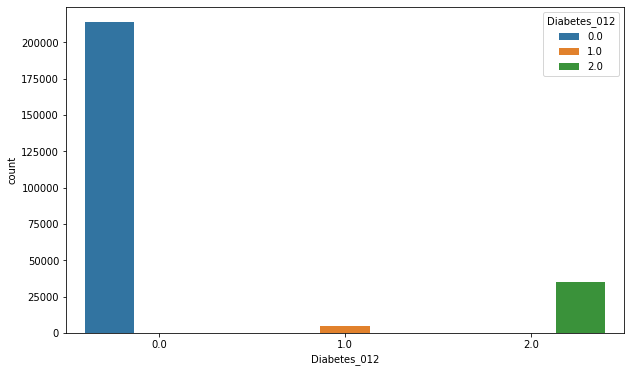

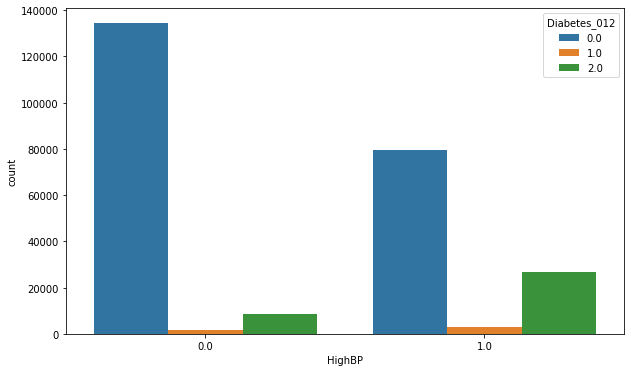

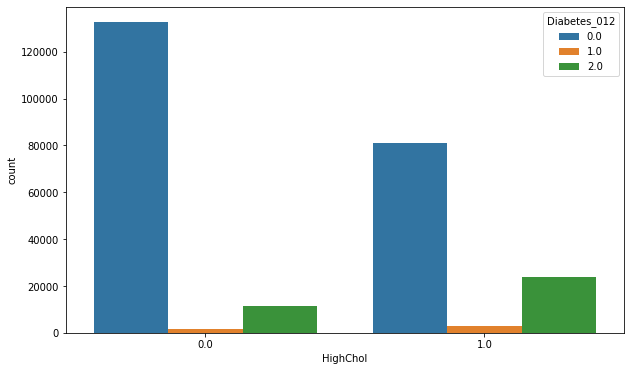

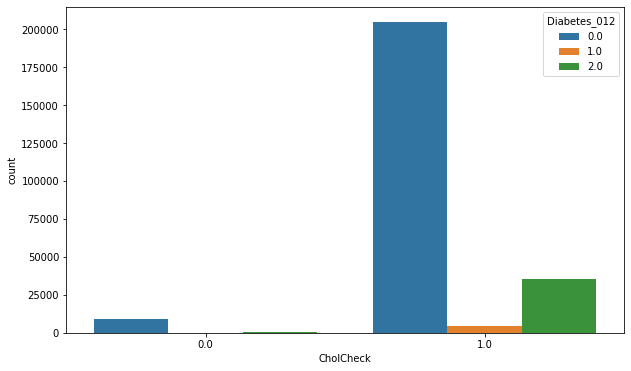

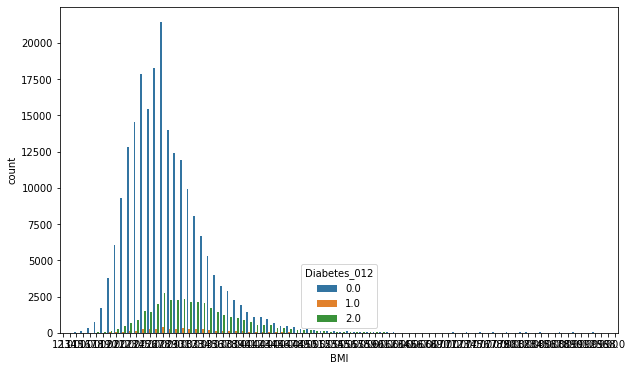

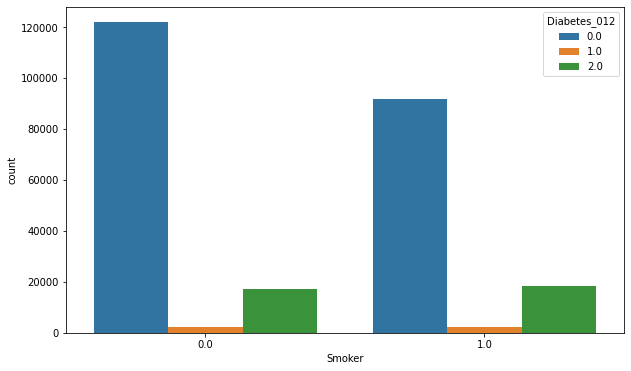

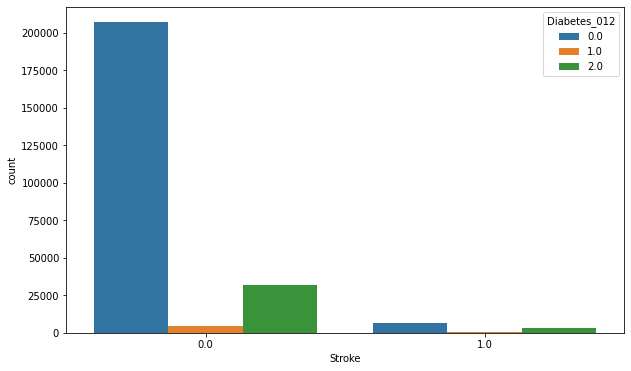

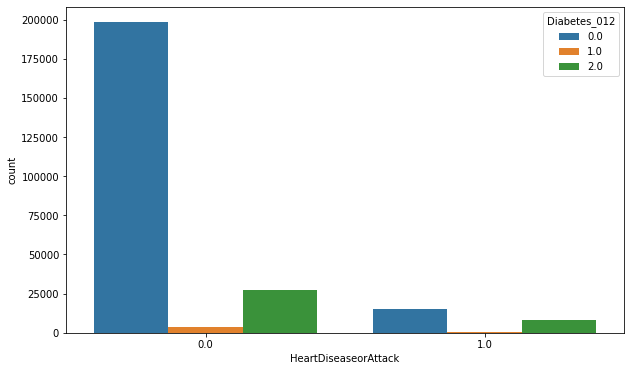

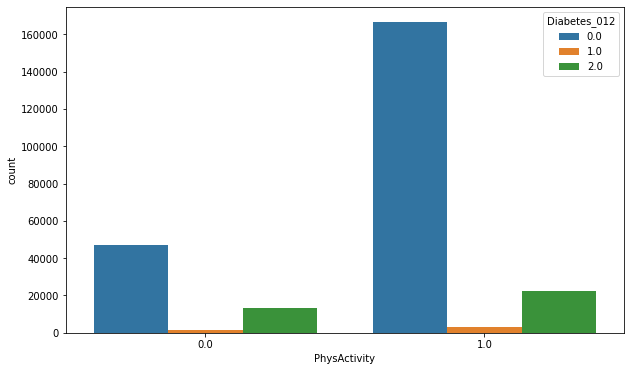

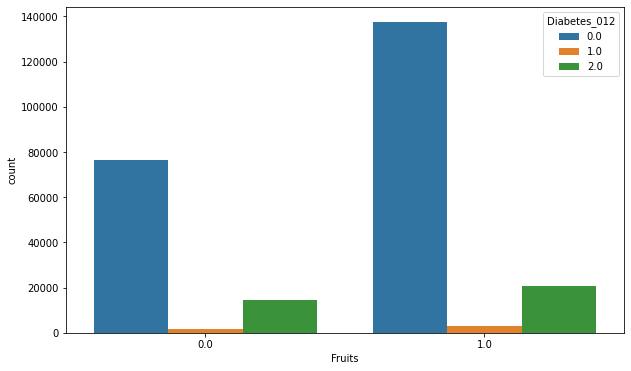

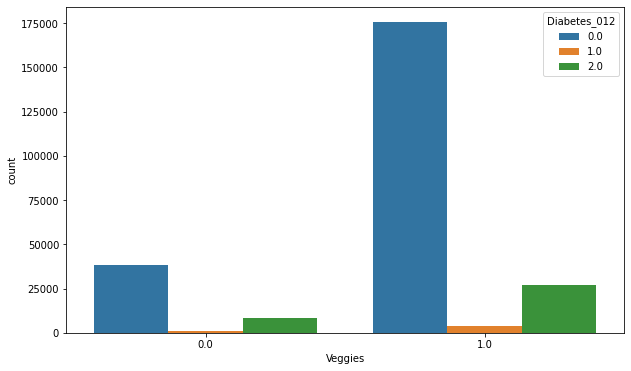

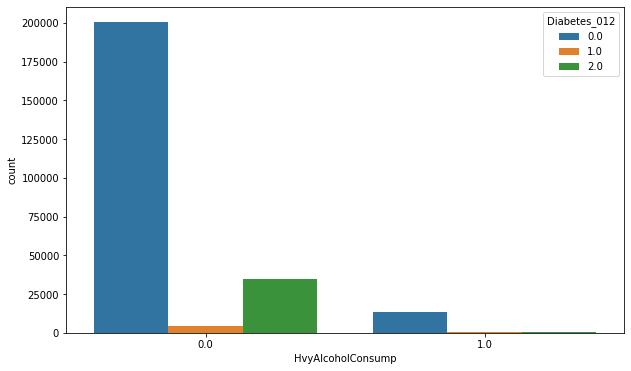

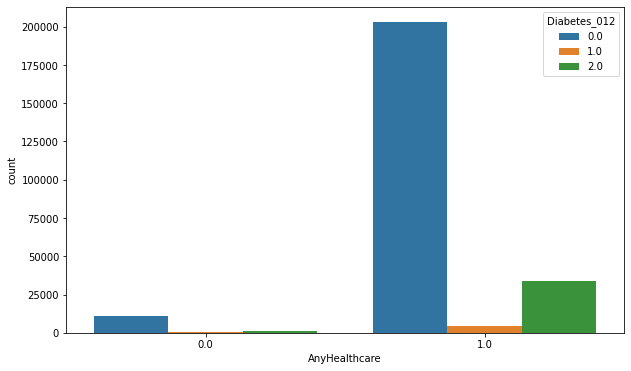

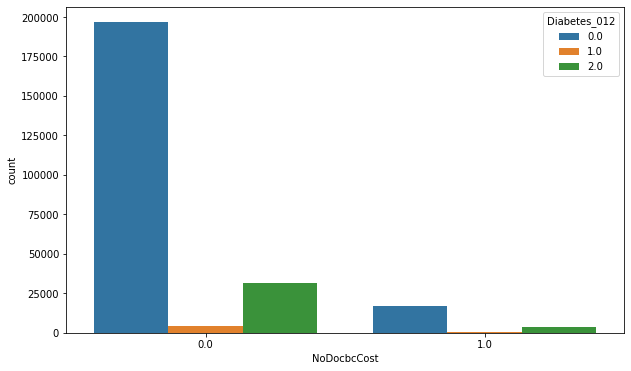

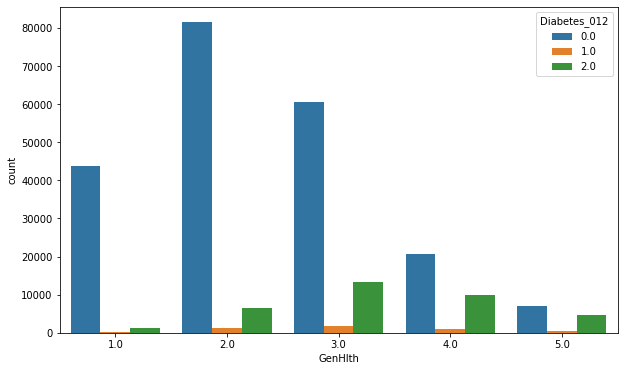

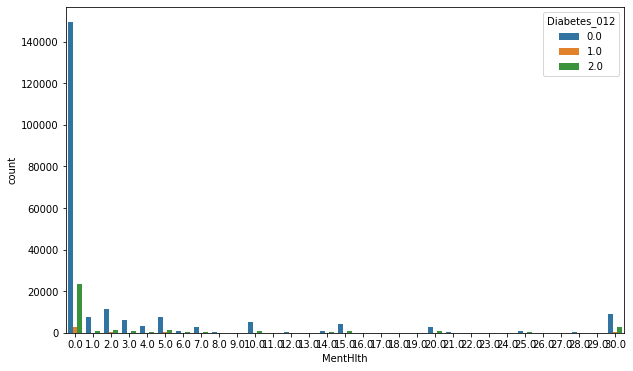

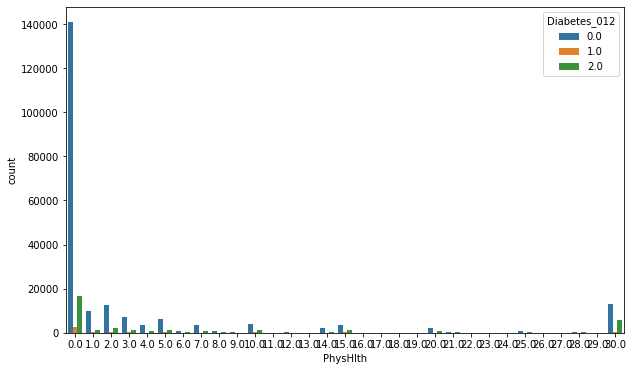

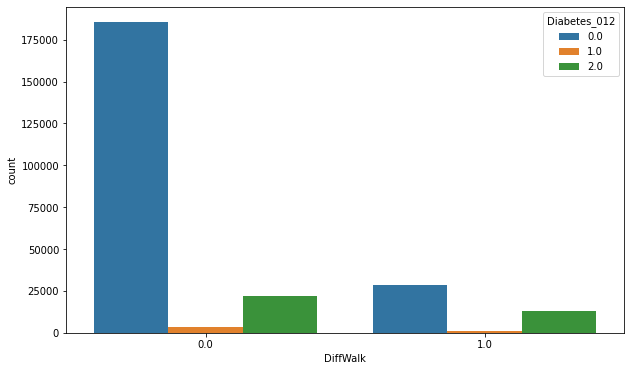

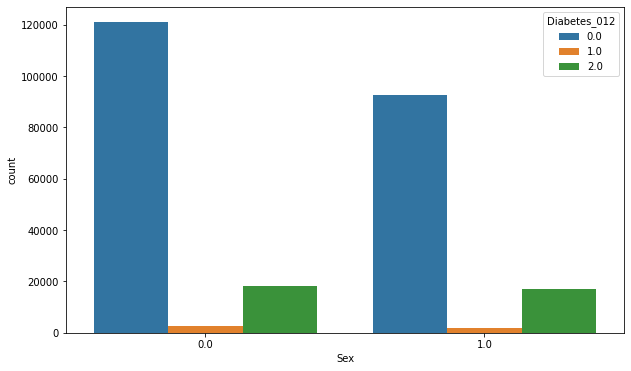

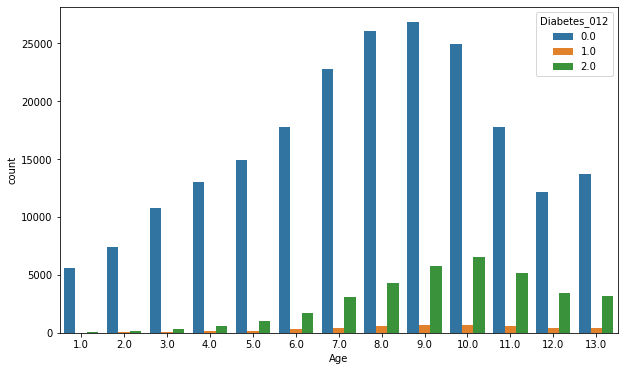

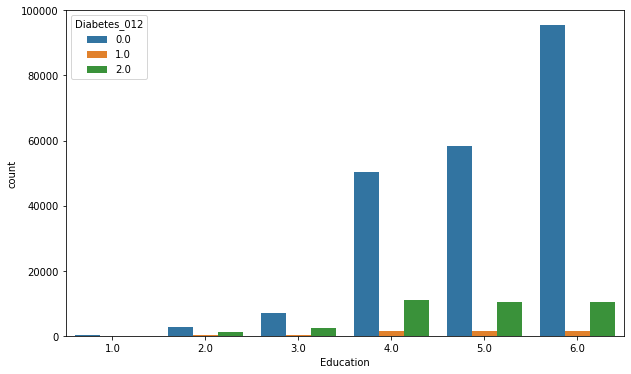

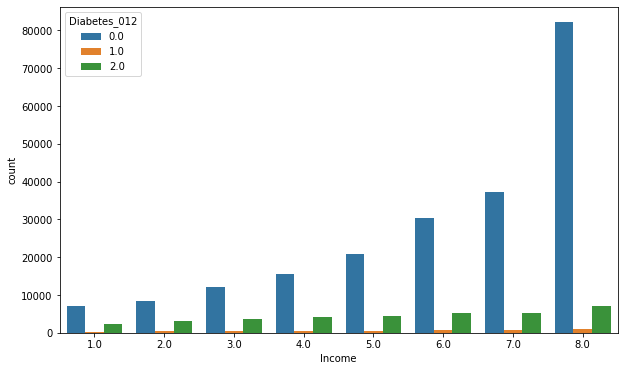

In [17]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    display(sns.countplot(data=df, x=col, hue=df.Diabetes_012))

<AxesSubplot:>

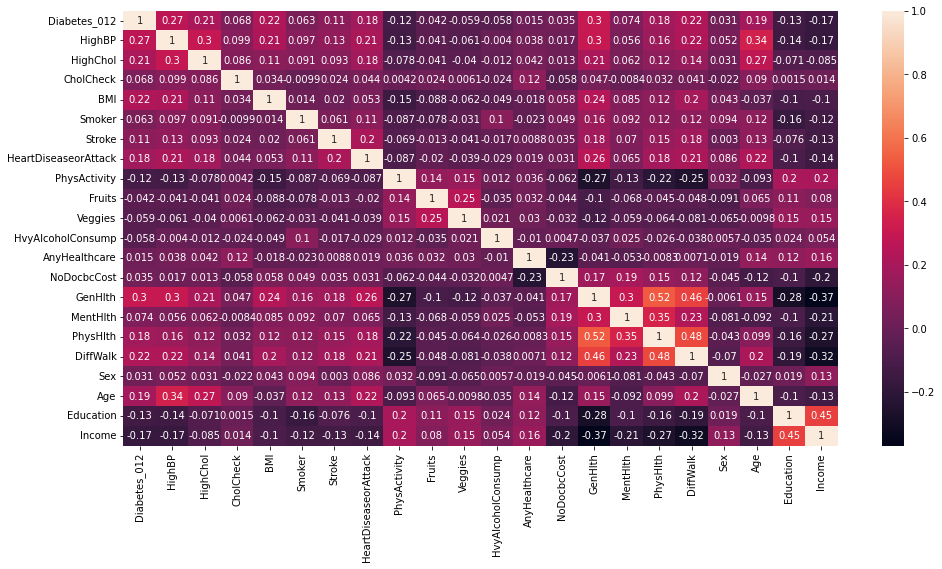

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)